In [14]:
from __future__ import print_function
import os
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np

from local_config import CURRENT_DIR
sys.path.append(os.path.join(CURRENT_DIR, ".."))

try:
    from config import Config
    from data_loader import WaymoStixelDataset
except:
    print("failed to load module")
    
from albumentations import (
    Resize,
    Compose,
    CLAHE,
    HueSaturationValue,
    RandomBrightness,
    RandomContrast,
    RandomGamma,
    ToFloat,
    Normalize,
    GaussNoise,
    RandomShadow,
    RandomRain,
)

import utility
import importlib
from models.stixel_net import build_stixel_net, build_stixel_net_small, build_stixel_net_inceptionV3

# TensorFlow
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    ReduceLROnPlateau,
    EarlyStopping,
)

In [15]:
dt_config = Config()
dt_config.display()


Configurations:
CURRENT_DIR                    /Users/menzweil/Development/StixelNet/obstacle_detection_stixelnet
DATA_PATH                      /Users/menzweil/Development/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo
GROUND_TRUTH_PATH              /Users/menzweil/Development/StixelNet/obstacle_detection_stixelnet/data/StixelNet_Waymo/waymo_train.txt
NUM_EPOCHS                     50
SAVED_MODELS_PATH              saved_models




In [16]:
## Val set

#val_aug = Compose([Normalize(p=1.0)])
val_set = WaymoStixelDataset(
        data_path=dt_config.DATA_PATH,
        ground_truth_path=os.path.join(dt_config.DATA_PATH, "waymo_val.txt"),
        transform=None,
    )


In [17]:
# StixelNet model

model = build_stixel_net()
#model = build_stixel_net_inceptionV3()

modelPath = "/Users/menzweil/Development/StixelNet/obstacle_detection_stixelnet/notebooks/saved_models/"
modelFile = modelPath + "model-028-65.2910.h5"
#modelFile = modelPath + "model-001-130611.1250.h5"
model.load_weights(modelFile)




ValueError: Cannot assign to variable dense_5/kernel:0 due to variable shape (159744, 128) and value shape (159744, 32) are incompatible

2022-03-12 00:55:27.315801: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-12 00:55:27.316017: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-12 00:55:27.346294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


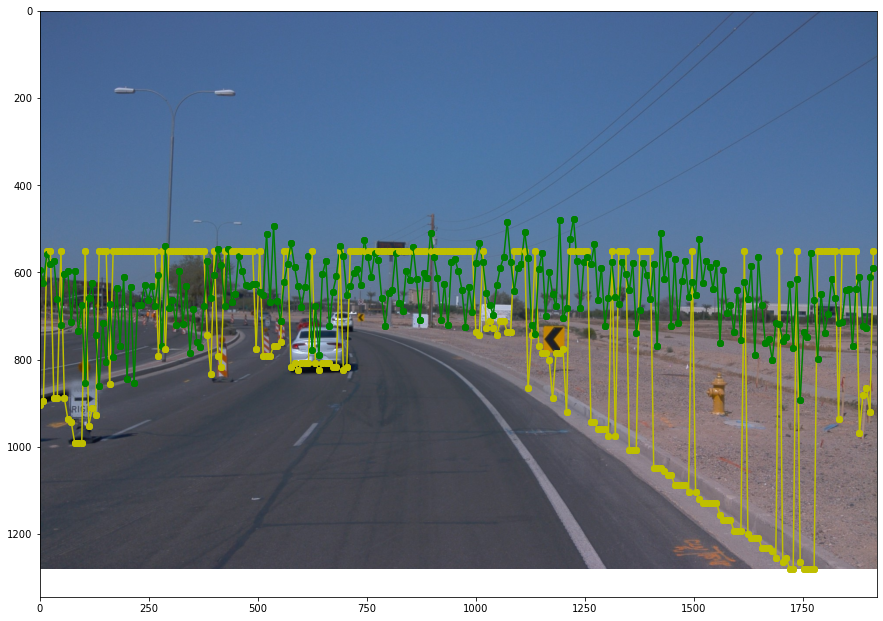

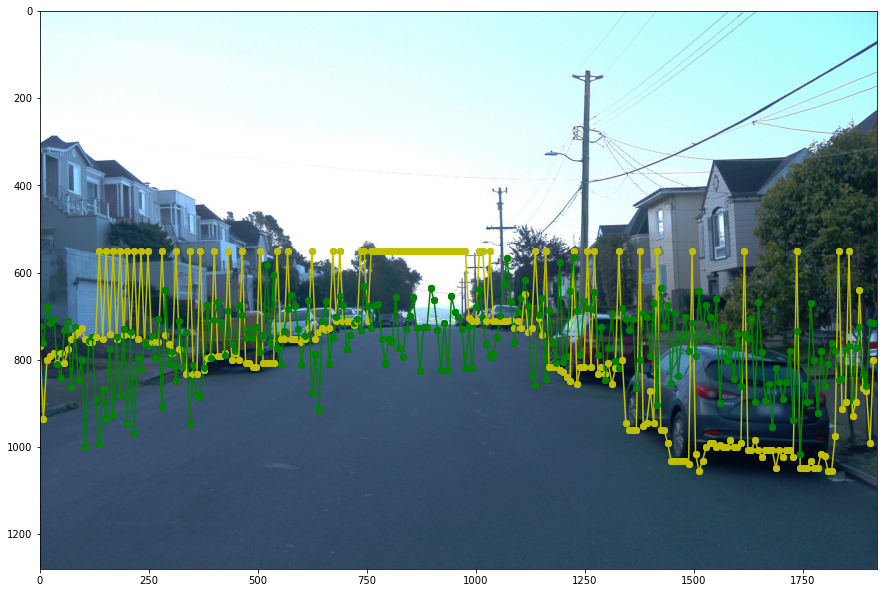

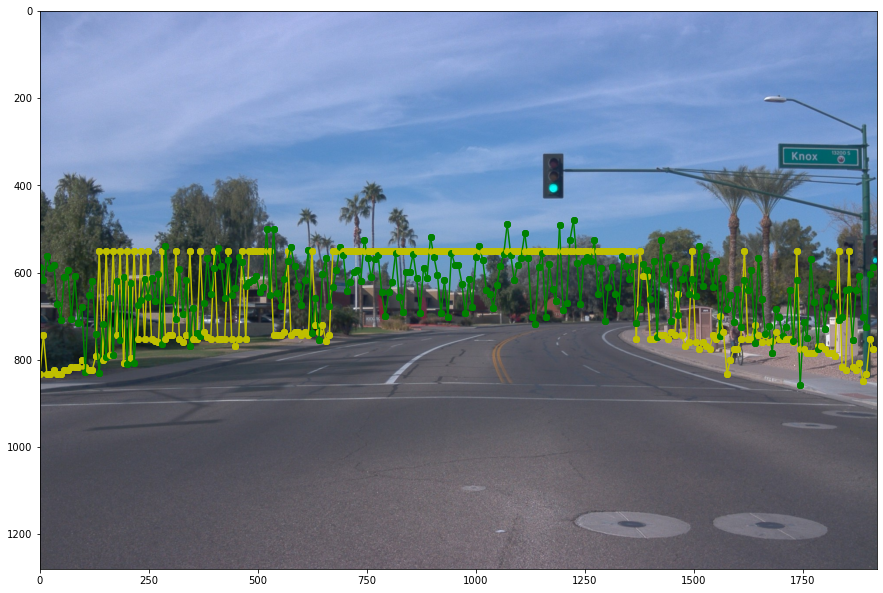

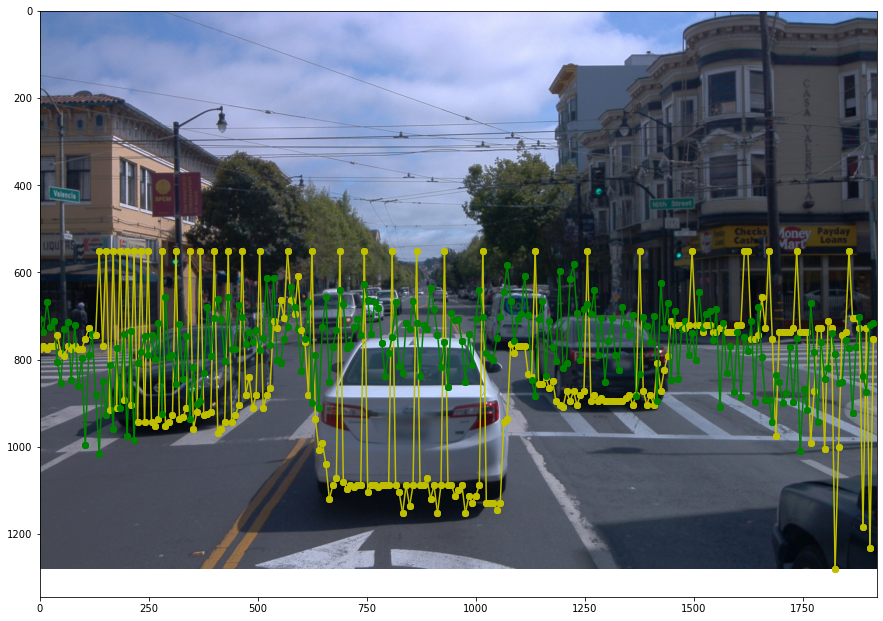

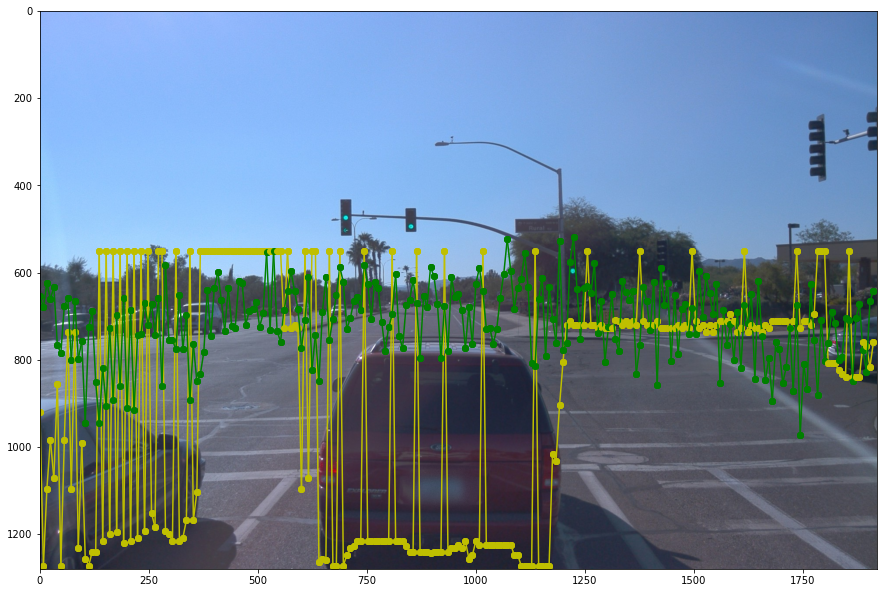

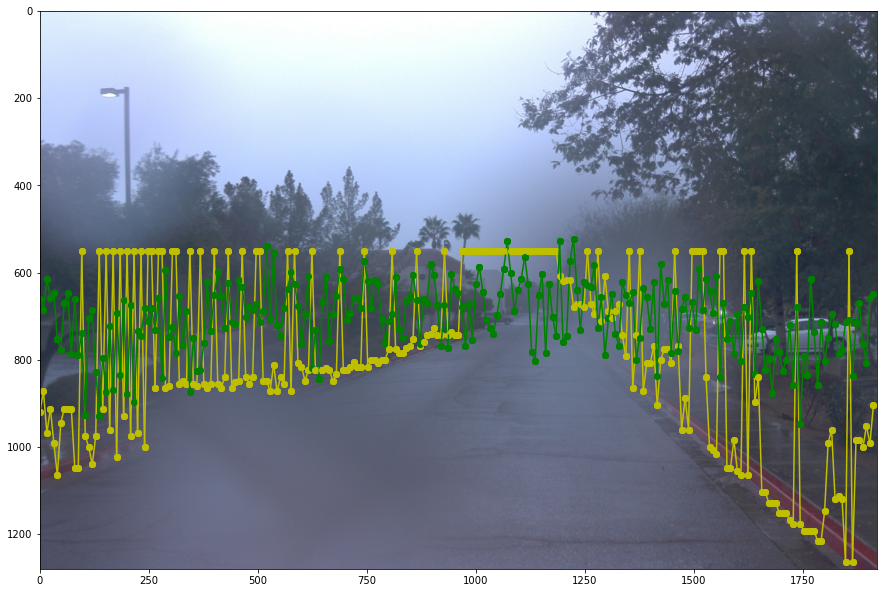

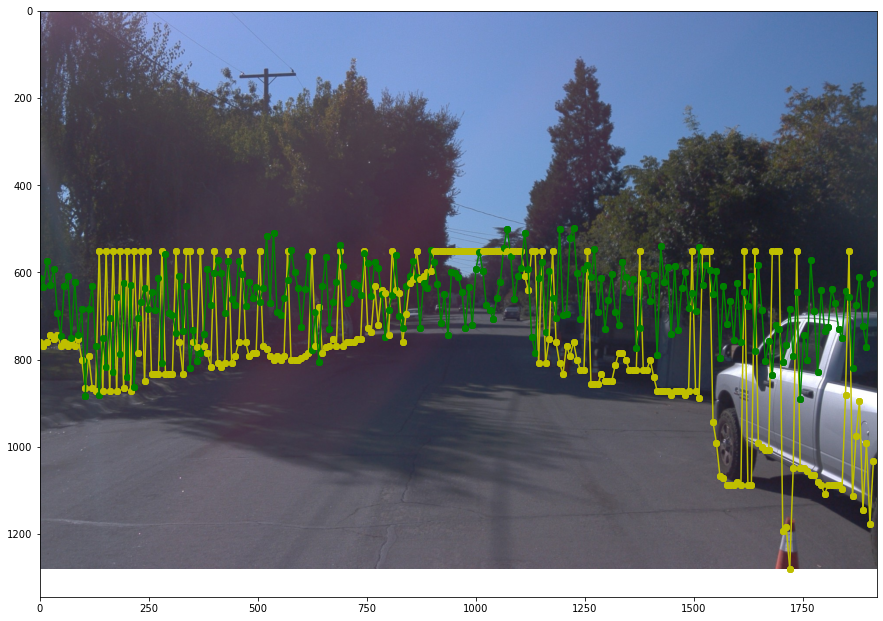

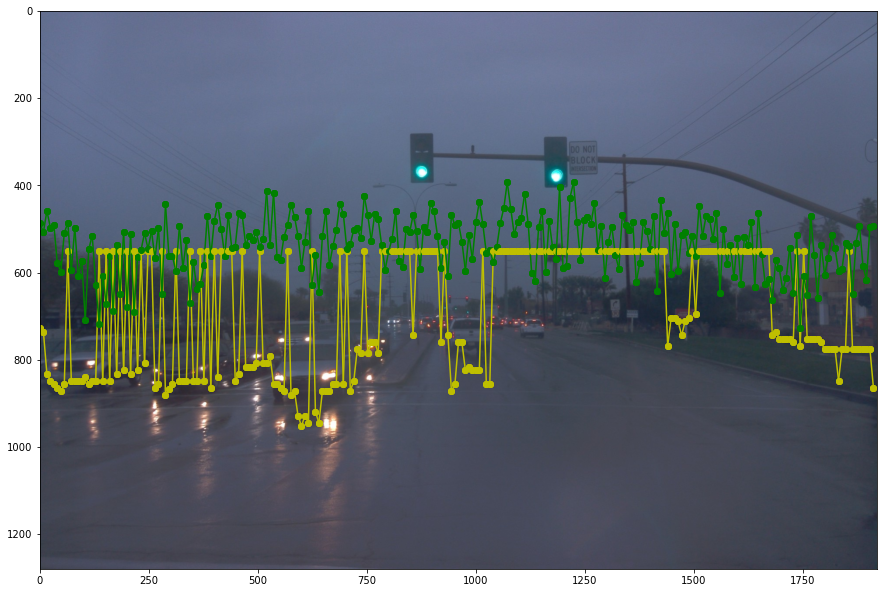

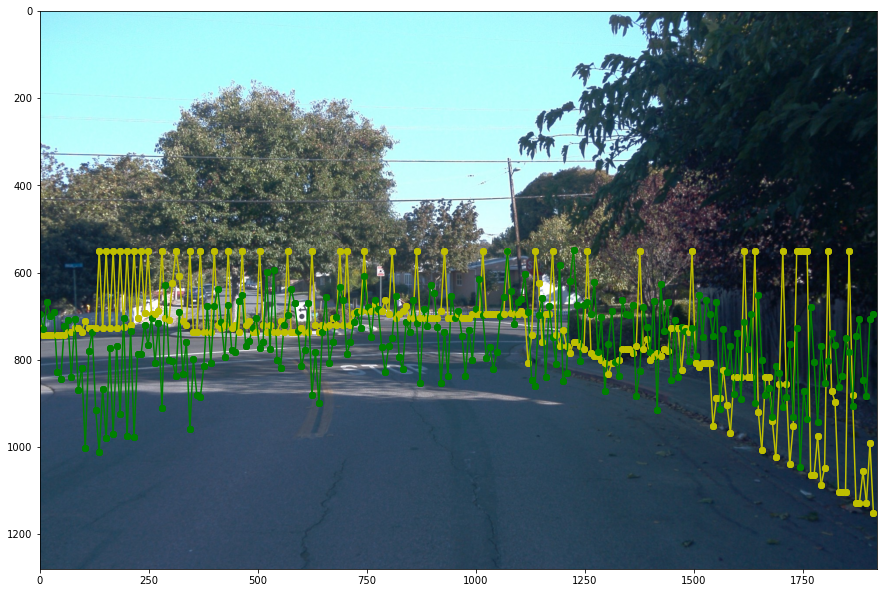

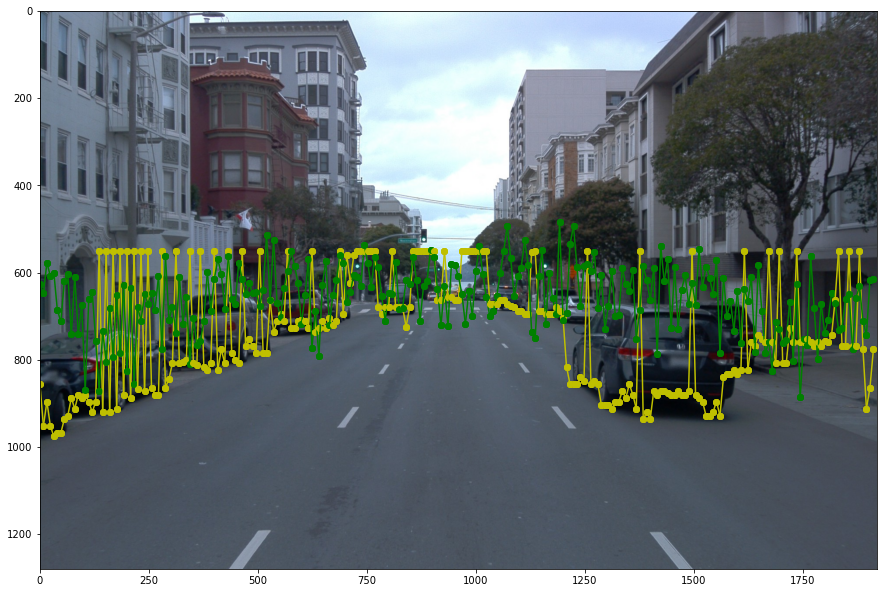

In [ ]:
# Run predictions
indices = np.random.randint(0,1000, (10,1))

for idx in indices:
    idx = int(idx)
    imgs, labels = val_set[idx]

    labels = labels[0]
    labels[labels >= 1000000000.0] = val_set._horizonYCoord

    predictions = model.predict(np.expand_dims(imgs[0],axis=0))
    predictions = predictions[0]

    #print(np.shape(predictions))

    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))

    origImageWidth = imgs[0].shape[1]
    labelWidth = labels.size

    x = list(range(0, origImageWidth, int(origImageWidth/labelWidth)))
    #print(labels)
    #print(predictions)
    plt.plot(x, labels, 'yo')
    plt.plot(x, predictions, 'go')
    for i in range(0, len(x), 1):
        plt.plot(x[i:i+2], labels[i:i+2],      'y-o')
        plt.plot(x[i:i+2], predictions[i:i+2], 'g-o')